<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/4-Data-Analysis/60-prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from prophet import Prophet

In [3]:
import prophet
print(prophet.__version__)


1.1.5


In [4]:
df = pd.read_excel('AAA.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Value'], dtype='object')

In [8]:
df.head()

,Value
TS,
2019-03-01 00:15:00,135.12
2019-03-01 00:30:00,131.28
2019-03-01 00:45:00,129.60
2019-03-01 01:00:00,126.48
2019-03-01 01:15:00,123.36


In [9]:
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [12]:
df.head()

,y
TS,
2019-03-01 00:15:00,135.12
2019-03-01 00:30:00,131.28
2019-03-01 00:45:00,129.60
2019-03-01 01:00:00,126.48
2019-03-01 01:15:00,123.36


In [11]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [14]:
df_day.index

RangeIndex(start=0, stop=558, step=1)

In [15]:
df_day.drop(df_day.index[557], inplace=True)

In [16]:
df_day.tail()

,ds,y
552,2020-09-03,17807.76
553,2020-09-04,18442.08
554,2020-09-05,18112.08
555,2020-09-06,17171.28
556,2020-09-07,14864.88


In [17]:
m = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True, uncertainty_samples=1000)

In [ ]:
m.fit(df_day)

In [19]:
future = m.make_future_dataframe(7, freq='D') # Forecasting 7 days

In [20]:
future.tail(7)

,ds
557,2020-09-08
558,2020-09-09
559,2020-09-10
560,2020-09-11
561,2020-09-12
562,2020-09-13
563,2020-09-14


In [21]:
forecast = m.predict(future)

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
550,2020-09-01,20387.840957,18999.505408,21822.028168
551,2020-09-02,20066.091257,18610.748556,21486.914797
552,2020-09-03,19733.532308,18345.819662,21289.194893
553,2020-09-04,19584.001629,18051.451260,21010.756978
554,2020-09-05,19265.213631,17796.237741,20776.694920
555,2020-09-06,18707.320094,17204.541833,20245.537692
556,2020-09-07,18852.521062,17329.422816,20247.609177
557,2020-09-08,18712.309255,17207.159038,20201.463090
558,2020-09-09,18493.784522,17038.615001,19886.266020
559,2020-09-10,18268.259328,16779.360310,19887.474152


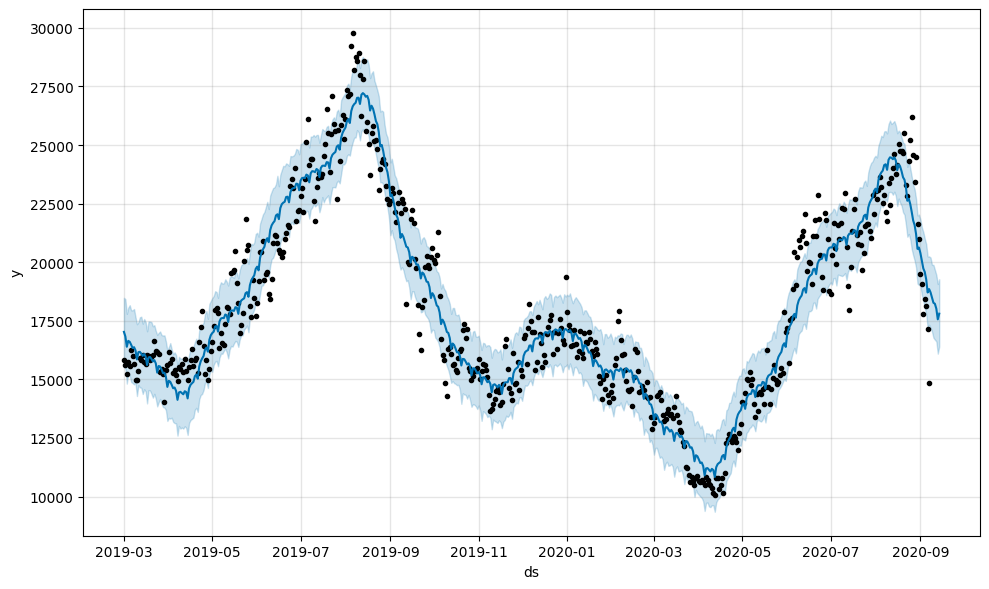

In [23]:
fig1 = m.plot(forecast)

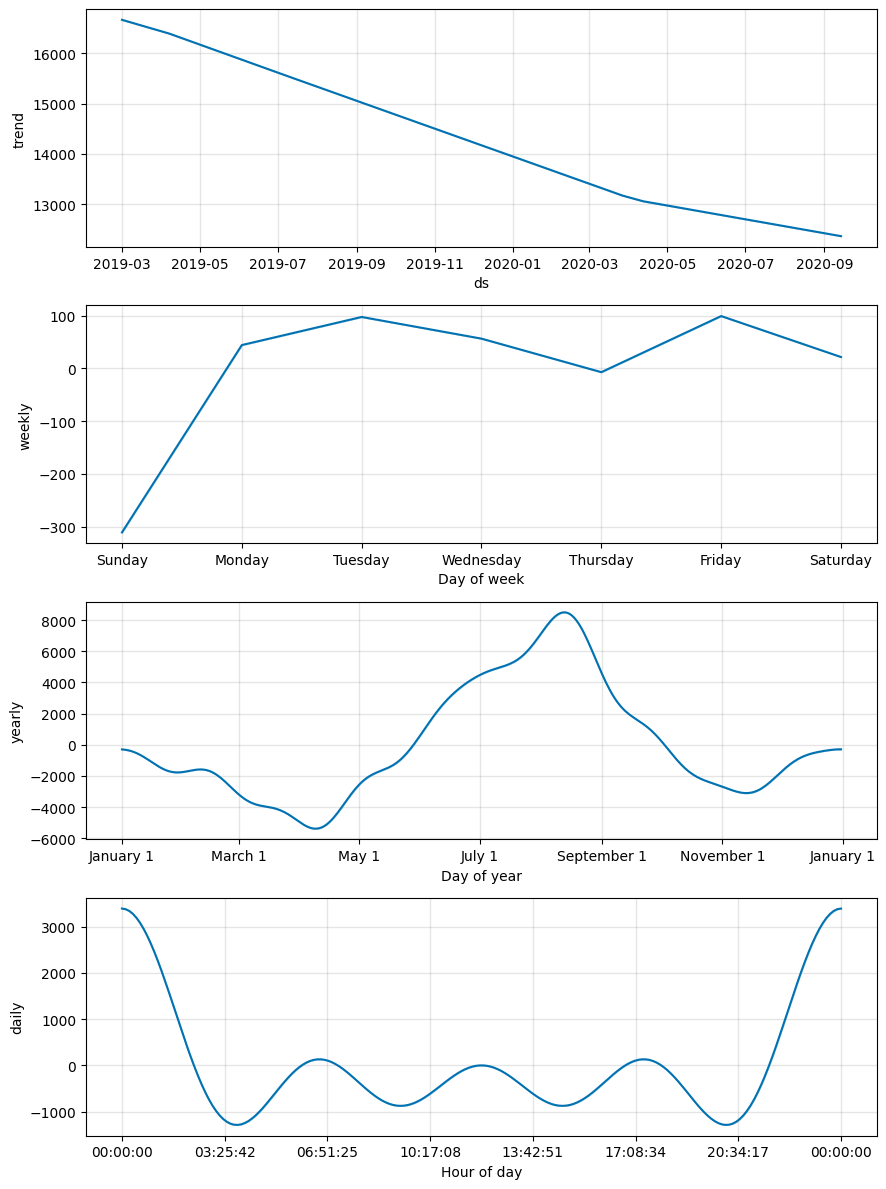

In [24]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)